In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3Nrb2pha3UtYWRtaW4vRG9jdW1lbnRzL3Byb2plY3RzL2FwcGxpZWQtc29mdC1jb21wL2RvY3MvbGVjdHVyZS1ub3RlL20wMi12aXN1YWxpemF0aW9u'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/skojaku-admin/.local/share/uv/python/cpython-3.11.6-macos-aarch64-none/lib/python3.11/importlib/_bootstrap.py": 1756893439.1114566, "/Users/skojaku-admin/.local/share/uv/python/cpython-3.11.6-macos-aarch64-none/lib/python3.11/importlib/_bootstrap_external.py": 1756893439.111954, "/Users/skojaku-admin/.local/share/uv/python/cpython-3.11.6-macos-aarch64-none/lib/python3.11/zipimport.py": 1756893439.5981421, "/Users/skojaku-admin/.local/share/uv/python/cpython-3.11.6-macos-aarch64-none/lib/python3.11/codecs.py": 1756893438.8338757, "/Users/skojaku-admin/.local/share/uv/python/cpython-3.11.6-macos-aarch64-none/lib/python3.11/encodings/aliases.py": 1756893438.9201, "/Users/skojaku-admin/.local/share/uv/python/cpython-3.11.6-macos-aarch64-none/lib/python3.11/encodings/__init__.py": 1756893438.9179149, "/Users/skojaku-admin/.local/share/uv/python/cpython-3.11.6-macos-aarch64-none/lib/python3.11/encodings/utf_8.py": 1756893438.9597929, "/Users/skojaku-admin/.local/share/uv/python/cpyt

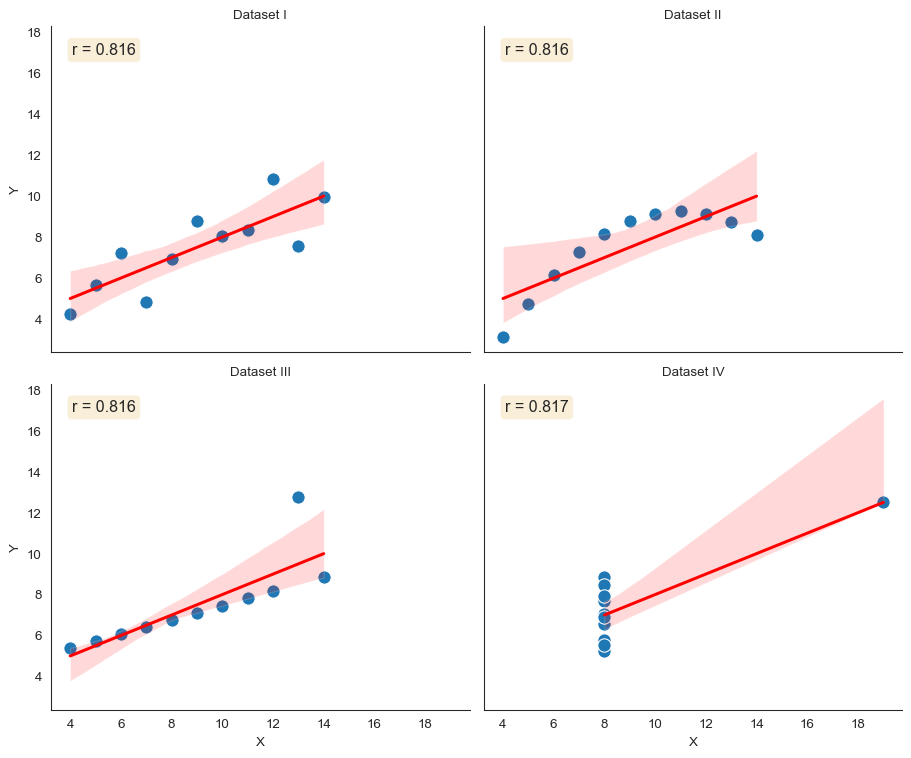

In [2]:
#| fig-cap: 'Anscombe''s Quartet: Four datasets with identical summary statistics but completely different relationships'
#| code-fold: true
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Anscombe's quartet
anscombe = sns.load_dataset("anscombe")

# Create the plot
sns.set_style("white")
g = sns.FacetGrid(anscombe, col="dataset", col_wrap=2, height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x="x", y="y", s=100)
g.map_dataframe(sns.regplot, x="x", y="y", scatter=False, color="red")
g.set_axis_labels("X", "Y")
g.set_titles("Dataset {col_name}")

# Add correlation to each subplot
for ax, dataset in zip(g.axes.flat, ["I", "II", "III", "IV"]):
    data_subset = anscombe[anscombe["dataset"] == dataset]
    r = np.corrcoef(data_subset["x"], data_subset["y"])[0, 1]
    ax.text(0.05, 0.95, f'r = {r:.3f}', transform=ax.transAxes,
            verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

sns.despine()
plt.tight_layout()

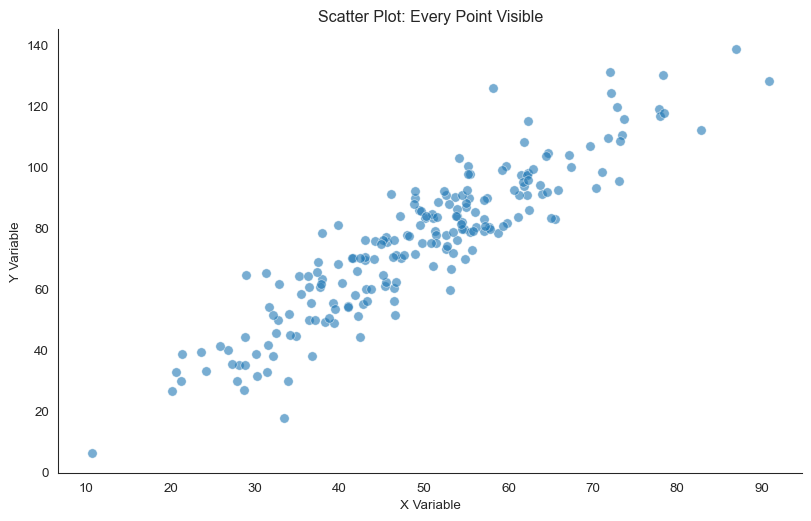

In [3]:
#| fig-cap: Basic scatter plot showing relationship between two variables
#| code-fold: true
# Generate sample data with clear relationship
np.random.seed(42)
n_points = 200
x = np.random.normal(50, 15, n_points)
y = 1.5 * x + np.random.normal(0, 10, n_points)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, alpha=0.6, s=50, edgecolors='white', linewidth=0.5)
ax.set_xlabel('X Variable')
ax.set_ylabel('Y Variable')
ax.set_title('Scatter Plot: Every Point Visible')
sns.despine()

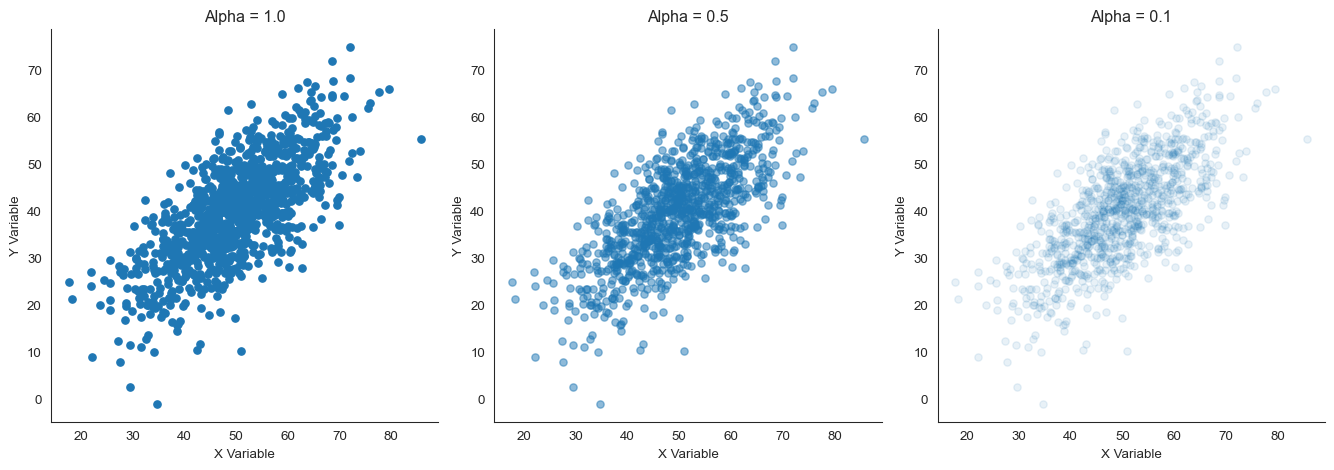

In [4]:
#| fig-cap: Scatter plots with different alpha values showing how transparency reveals density
#| code-fold: true
# Generate data with heavy overlap
np.random.seed(123)
n_points = 1000
x_overlap = np.random.normal(50, 10, n_points)
y_overlap = 0.8 * x_overlap + np.random.normal(0, 8, n_points)

fig, axes = plt.subplots(1, 3, figsize=(14, 5))
alphas = [1.0, 0.5, 0.1]

for ax, alpha in zip(axes, alphas):
    ax.scatter(x_overlap, y_overlap, alpha=alpha, s=30)
    ax.set_xlabel('X Variable')
    ax.set_ylabel('Y Variable')
    ax.set_title(f'Alpha = {alpha}')
    sns.despine(ax=ax)

plt.tight_layout()

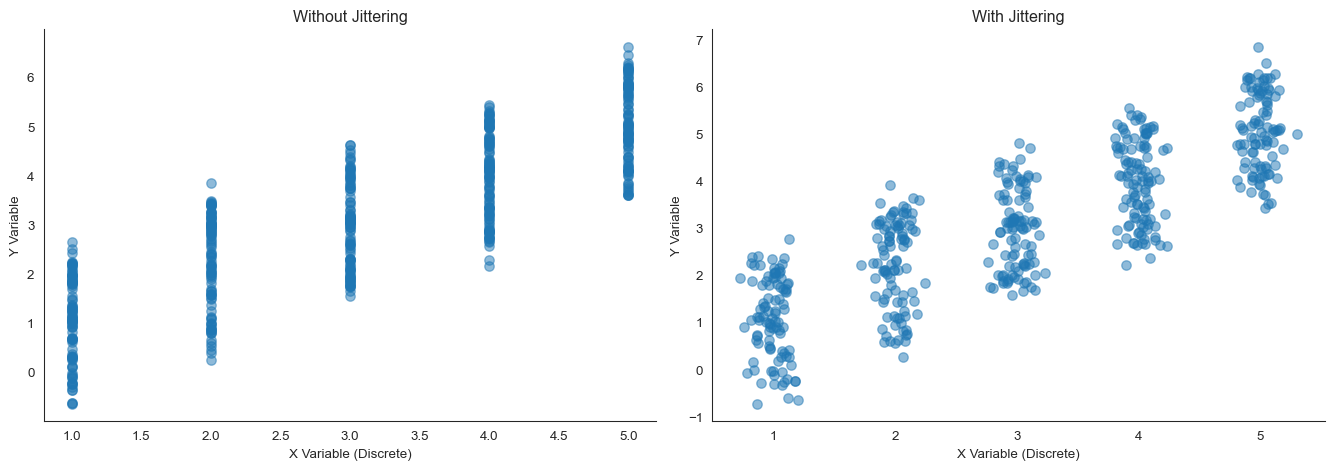

In [5]:
#| fig-cap: Jittering helps separate discrete or overlapping points
#| code-fold: true
# Generate data with discrete values (common in survey data)
np.random.seed(456)
n_points = 500
x_discrete = np.random.choice([1, 2, 3, 4, 5], n_points)
y_discrete = x_discrete + np.random.choice([-1, 0, 1], n_points) + np.random.normal(0, 0.3, n_points)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Without jitter
axes[0].scatter(x_discrete, y_discrete, alpha=0.5, s=50)
axes[0].set_xlabel('X Variable (Discrete)')
axes[0].set_ylabel('Y Variable')
axes[0].set_title('Without Jittering')
sns.despine(ax=axes[0])

# With jitter
jitter_x = x_discrete + np.random.normal(0, 0.1, n_points)
jitter_y = y_discrete + np.random.normal(0, 0.1, n_points)
axes[1].scatter(jitter_x, jitter_y, alpha=0.5, s=50)
axes[1].set_xlabel('X Variable (Discrete)')
axes[1].set_ylabel('Y Variable')
axes[1].set_title('With Jittering')
sns.despine(ax=axes[1])

plt.tight_layout()

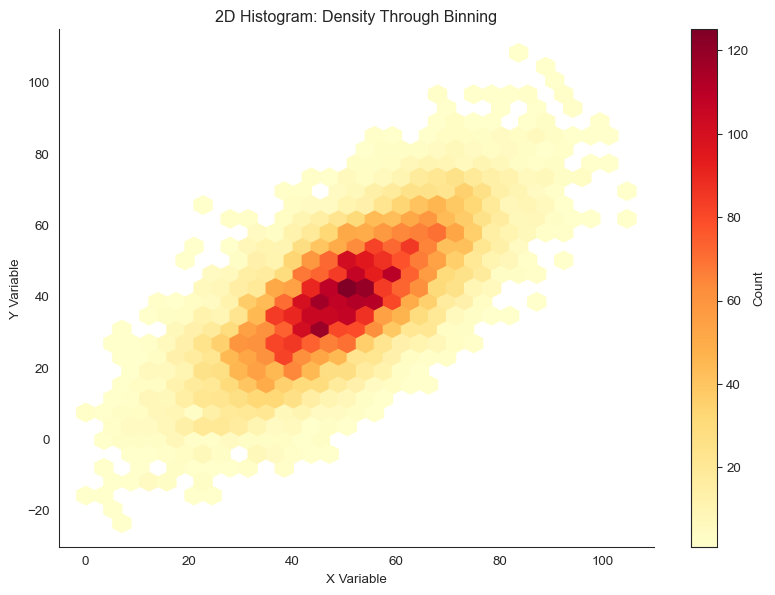

In [6]:
#| fig-cap: 2D histogram showing density through rectangular bins
#| code-fold: true
# Generate large dataset
np.random.seed(789)
n_large = 10000
x_large = np.random.normal(50, 15, n_large)
y_large = 0.8 * x_large + np.random.normal(0, 12, n_large)

fig, ax = plt.subplots(figsize=(10, 7))
hb = ax.hexbin(x_large, y_large, gridsize=30, cmap='YlOrRd', mincnt=1)
ax.set_xlabel('X Variable')
ax.set_ylabel('Y Variable')
ax.set_title('2D Histogram: Density Through Binning')
cb = plt.colorbar(hb, ax=ax)
cb.set_label('Count')
sns.despine()

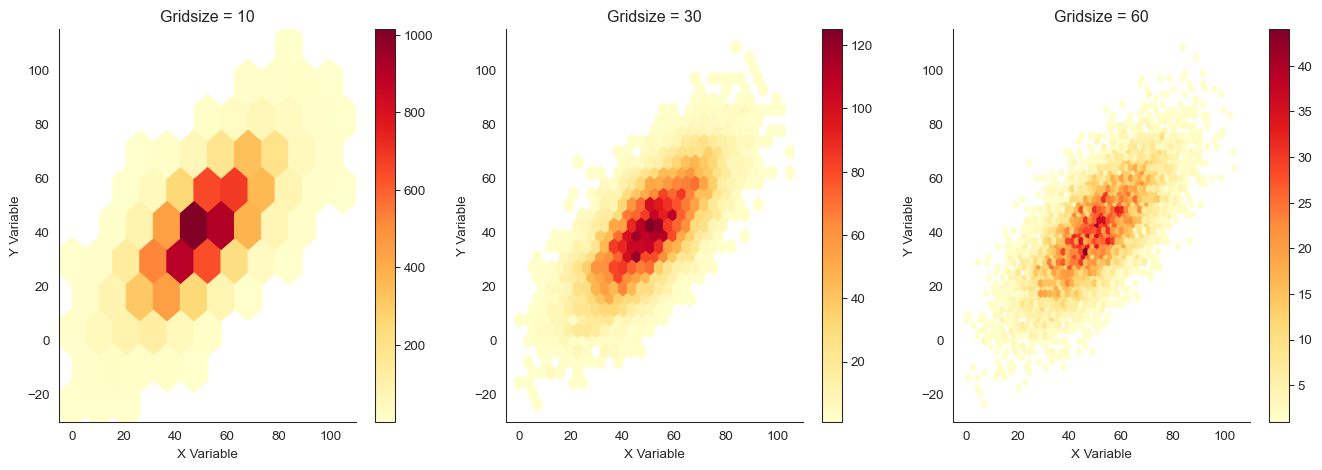

In [7]:
#| fig-cap: Effect of bin size on 2D histograms
#| code-fold: true
fig, axes = plt.subplots(1, 3, figsize=(14, 5))
gridsizes = [10, 30, 60]

for ax, gridsize in zip(axes, gridsizes):
    hb = ax.hexbin(x_large, y_large, gridsize=gridsize, cmap='YlOrRd', mincnt=1)
    ax.set_xlabel('X Variable')
    ax.set_ylabel('Y Variable')
    ax.set_title(f'Gridsize = {gridsize}')
    plt.colorbar(hb, ax=ax)
    sns.despine(ax=ax)

plt.tight_layout()

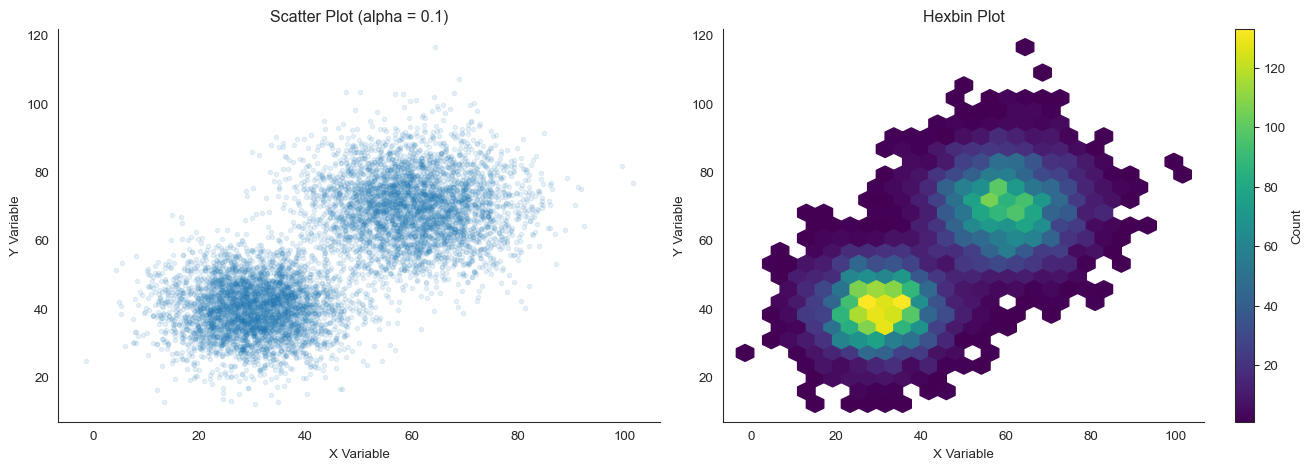

In [8]:
#| fig-cap: Hexbin plot provides more perceptually uniform density representation
#| code-fold: true
# Generate data with interesting structure
np.random.seed(101)
n = 8000

# Create two clusters
cluster1_x = np.random.normal(30, 8, n // 2)
cluster1_y = np.random.normal(40, 8, n // 2)
cluster2_x = np.random.normal(60, 10, n // 2)
cluster2_y = np.random.normal(70, 10, n // 2)

x_clusters = np.concatenate([cluster1_x, cluster2_x])
y_clusters = np.concatenate([cluster1_y, cluster2_y])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot (for reference)
axes[0].scatter(x_clusters, y_clusters, alpha=0.1, s=10)
axes[0].set_xlabel('X Variable')
axes[0].set_ylabel('Y Variable')
axes[0].set_title('Scatter Plot (alpha = 0.1)')
sns.despine(ax=axes[0])

# Hexbin plot
hb = axes[1].hexbin(x_clusters, y_clusters, gridsize=25, cmap='viridis', mincnt=1)
axes[1].set_xlabel('X Variable')
axes[1].set_ylabel('Y Variable')
axes[1].set_title('Hexbin Plot')
plt.colorbar(hb, ax=axes[1], label='Count')
sns.despine(ax=axes[1])

plt.tight_layout()

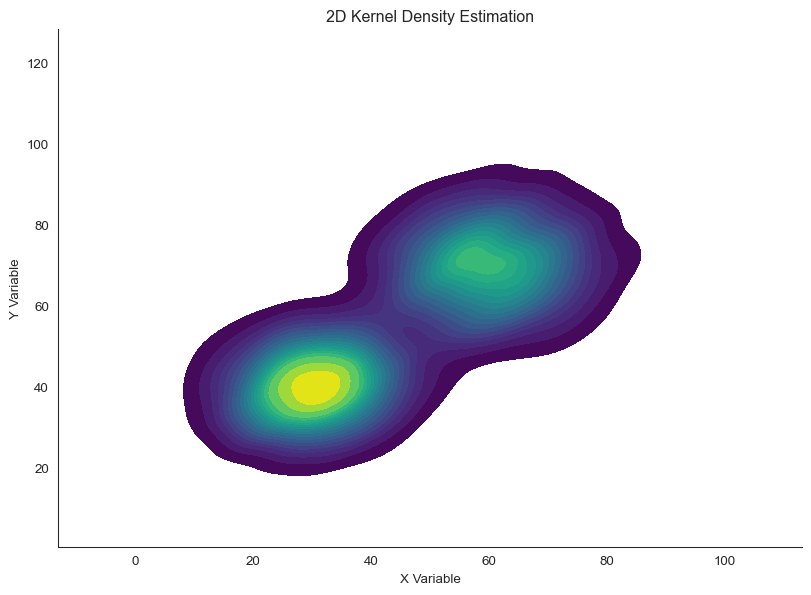

In [9]:
#| fig-cap: 2D kernel density estimation provides smooth density surface
#| code-fold: true
# Use the clustered data
fig, ax = plt.subplots(figsize=(10, 7))
sns.kdeplot(x=x_clusters, y=y_clusters, cmap='viridis', fill=True, thresh=0.05, levels=20, ax=ax)
ax.set_xlabel('X Variable')
ax.set_ylabel('Y Variable')
ax.set_title('2D Kernel Density Estimation')
sns.despine()

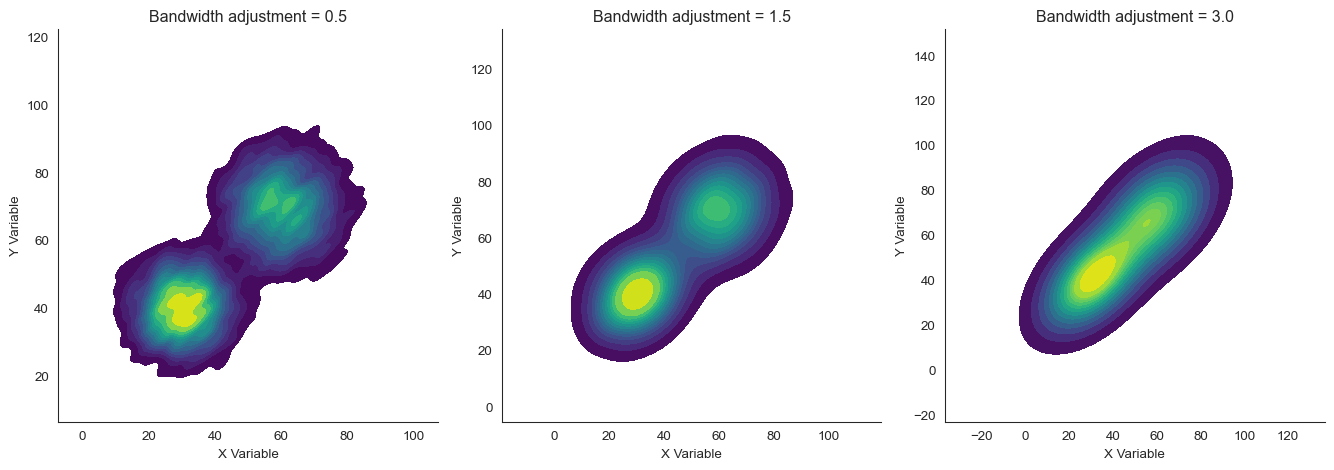

In [10]:
#| fig-cap: Effect of bandwidth on 2D KDE smoothness
#| code-fold: true
fig, axes = plt.subplots(1, 3, figsize=(14, 5))
bandwidths = [0.5, 1.5, 3.0]

for ax, bw in zip(axes, bandwidths):
    sns.kdeplot(x=x_clusters, y=y_clusters, cmap='viridis', fill=True,
                bw_adjust=bw, thresh=0.05, levels=15, ax=ax)
    ax.set_xlabel('X Variable')
    ax.set_ylabel('Y Variable')
    ax.set_title(f'Bandwidth adjustment = {bw}')
    sns.despine(ax=ax)

plt.tight_layout()

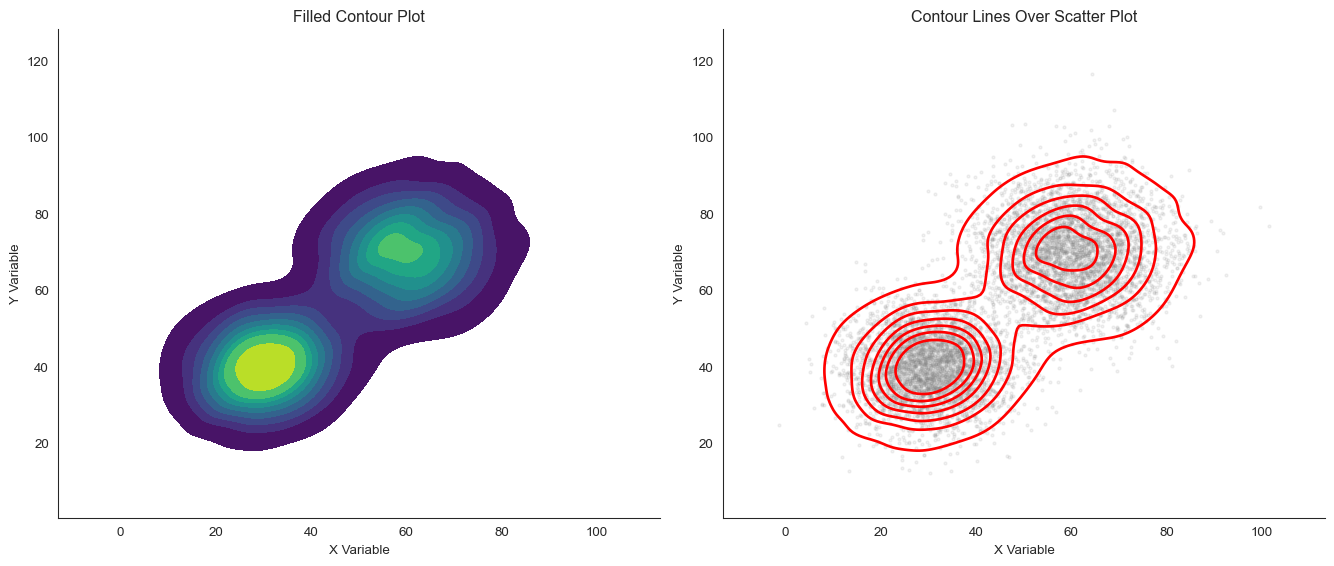

In [11]:
#| fig-cap: Contour plot shows density as topographic lines
#| code-fold: true
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Filled contours
sns.kdeplot(x=x_clusters, y=y_clusters, cmap='viridis', fill=True,
            thresh=0.05, levels=10, ax=axes[0])
axes[0].set_xlabel('X Variable')
axes[0].set_ylabel('Y Variable')
axes[0].set_title('Filled Contour Plot')
sns.despine(ax=axes[0])

# Line contours with scatter
axes[1].scatter(x_clusters, y_clusters, alpha=0.1, s=5, c='gray')
sns.kdeplot(x=x_clusters, y=y_clusters, levels=8, color='red', linewidths=2, ax=axes[1])
axes[1].set_xlabel('X Variable')
axes[1].set_ylabel('Y Variable')
axes[1].set_title('Contour Lines Over Scatter Plot')
sns.despine(ax=axes[1])

plt.tight_layout()

Text(0.5, 1.01, 'Joint Distribution with Marginal Histograms')

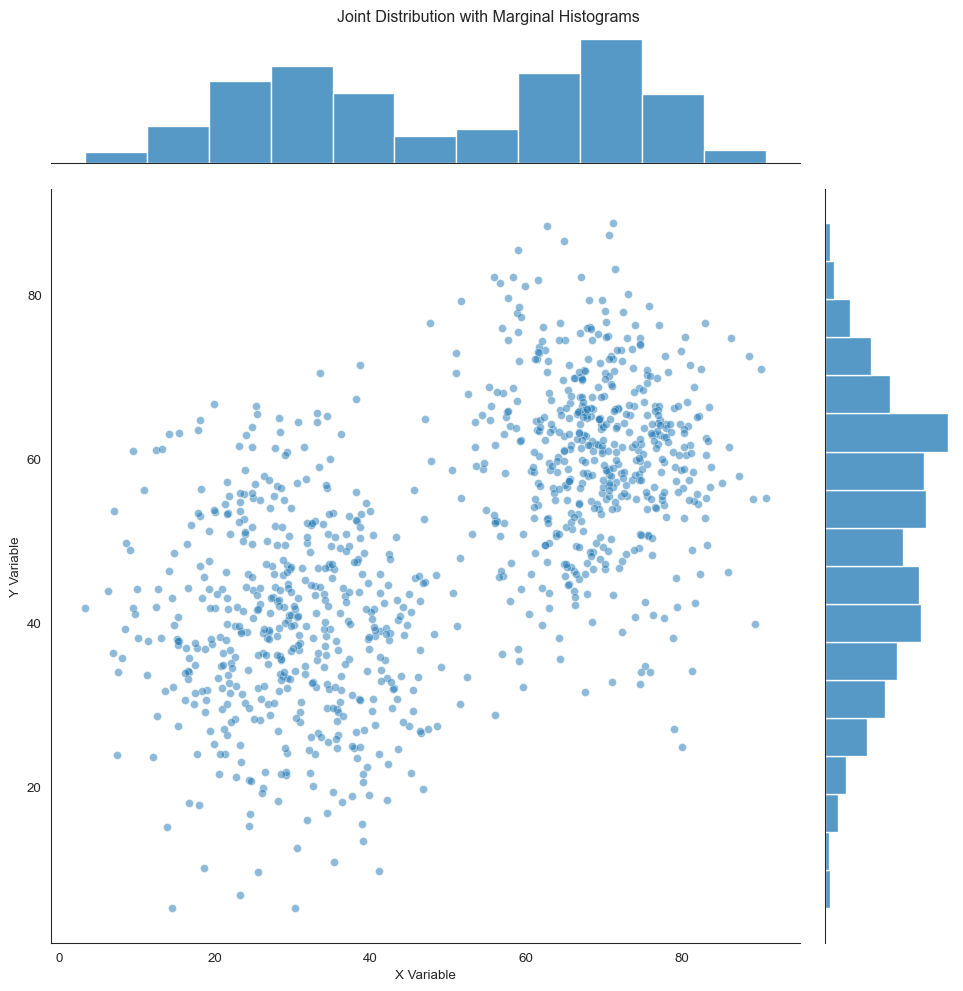

In [12]:
#| fig-cap: Joint plot combining 2D scatter with marginal 1D distributions
#| code-fold: true
# Generate data with interesting marginals
np.random.seed(202)
n = 1000
x_joint = np.concatenate([np.random.normal(30, 10, n//2), np.random.normal(70, 8, n//2)])
y_joint = np.concatenate([np.random.normal(40, 12, n//2), np.random.normal(60, 10, n//2)])

# Create joint plot
g = sns.jointplot(x=x_joint, y=y_joint, kind='scatter', alpha=0.5, height=10)
g.set_axis_labels('X Variable', 'Y Variable')
g.fig.suptitle('Joint Distribution with Marginal Histograms', y=1.01)

Text(0.5, 1.01, 'Joint Plot: Hexbin Center with KDE Margins')

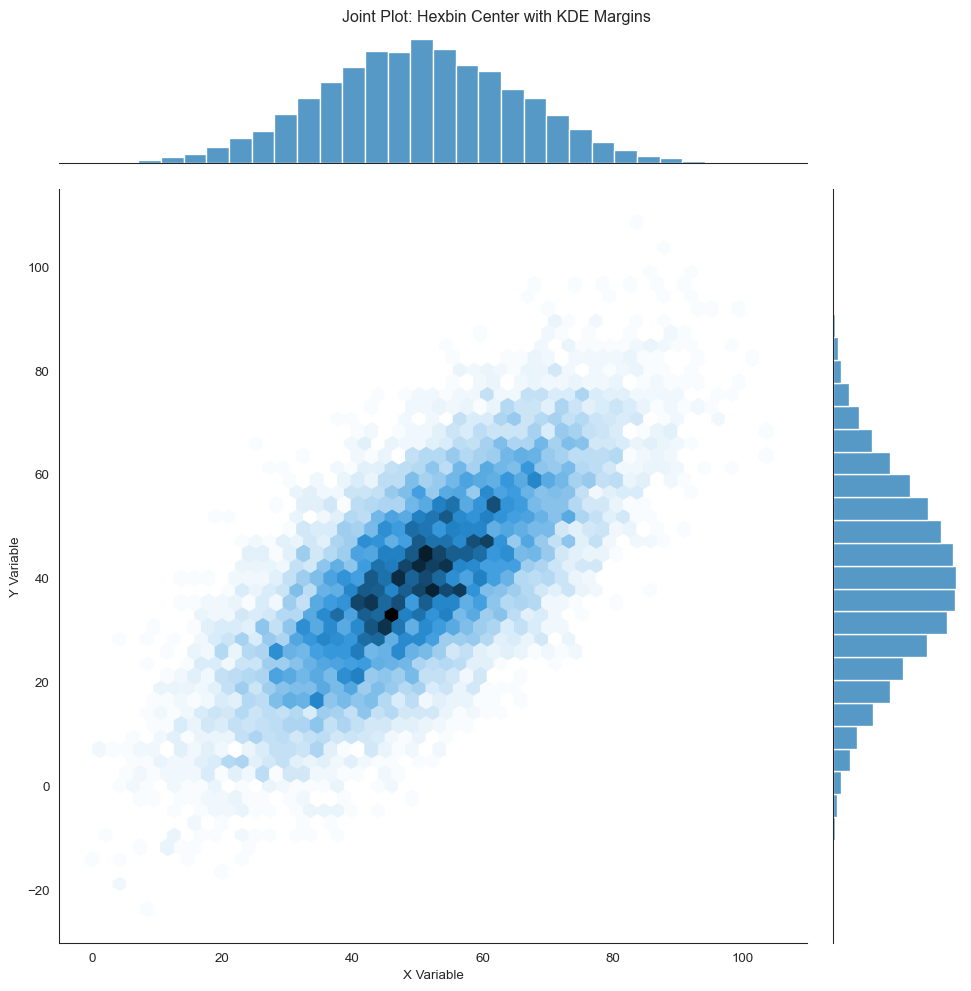

In [13]:
#| fig-cap: Joint plot with hexbin center and KDE margins
#| code-fold: true
# Create joint plot with hexbin and KDE
g = sns.jointplot(x=x_large, y=y_large, kind='hex', height=10,
                  marginal_kws=dict(bins=30, fill=True))
g.set_axis_labels('X Variable', 'Y Variable')
g.fig.suptitle('Joint Plot: Hexbin Center with KDE Margins', y=1.01)

Text(0.5, 1.01, 'Joint Plot: All KDE')

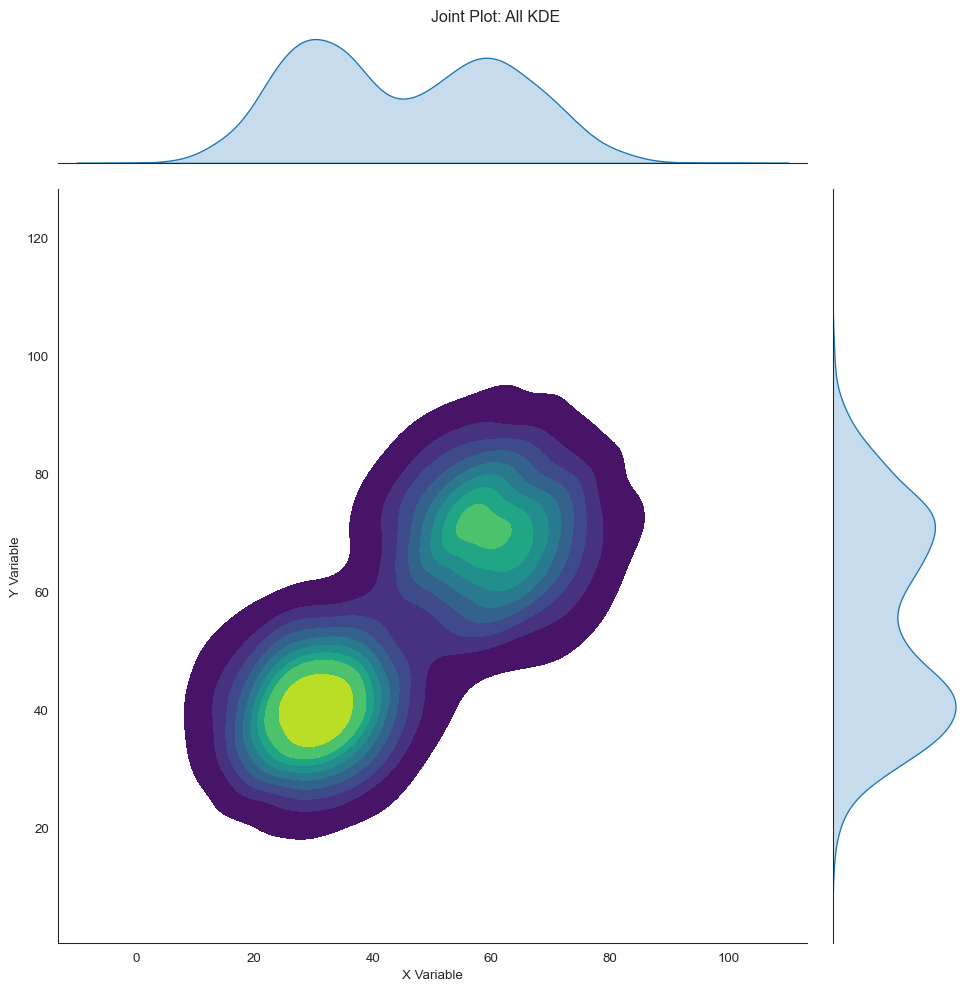

In [14]:
#| fig-cap: Joint plot with 2D KDE center and 1D KDE margins
#| code-fold: true
g = sns.jointplot(x=x_clusters, y=y_clusters, kind='kde', height=10,
                  fill=True, cmap='viridis', thresh=0.05)
g.set_axis_labels('X Variable', 'Y Variable')
g.fig.suptitle('Joint Plot: All KDE', y=1.01)

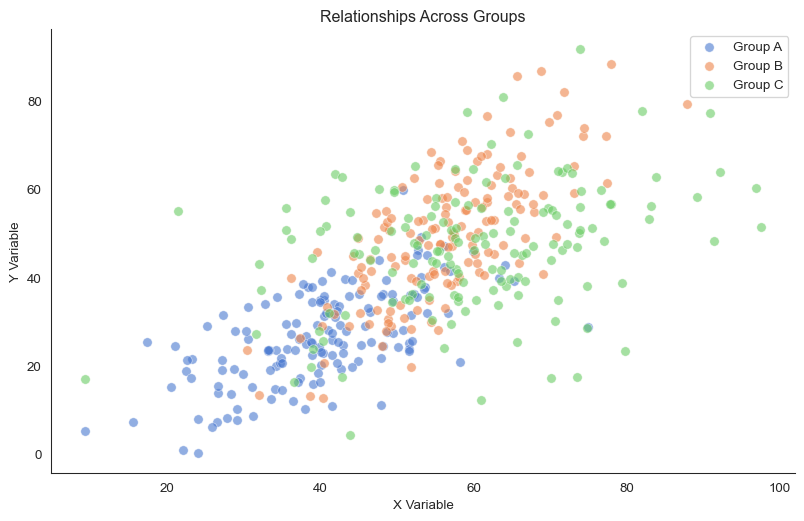

In [15]:
#| fig-cap: Scatter plot with color-coded groups
#| code-fold: true
# Generate multi-group data
np.random.seed(303)
n_per_group = 150

group_a_x = np.random.normal(40, 12, n_per_group)
group_a_y = 0.7 * group_a_x + np.random.normal(0, 8, n_per_group)

group_b_x = np.random.normal(55, 10, n_per_group)
group_b_y = 1.2 * group_b_x + np.random.normal(-20, 10, n_per_group)

group_c_x = np.random.normal(60, 15, n_per_group)
group_c_y = 0.3 * group_c_x + np.random.normal(30, 12, n_per_group)

df_groups = pd.DataFrame({
    'x': np.concatenate([group_a_x, group_b_x, group_c_x]),
    'y': np.concatenate([group_a_y, group_b_y, group_c_y]),
    'group': ['A'] * n_per_group + ['B'] * n_per_group + ['C'] * n_per_group
})

fig, ax = plt.subplots(figsize=(10, 6))
for group, color in zip(['A', 'B', 'C'], sns.color_palette('muted', 3)):
    subset = df_groups[df_groups['group'] == group]
    ax.scatter(subset['x'], subset['y'], label=f'Group {group}',
               alpha=0.6, s=50, color=color, edgecolors='white', linewidth=0.5)

ax.set_xlabel('X Variable')
ax.set_ylabel('Y Variable')
ax.set_title('Relationships Across Groups')
ax.legend()
sns.despine()

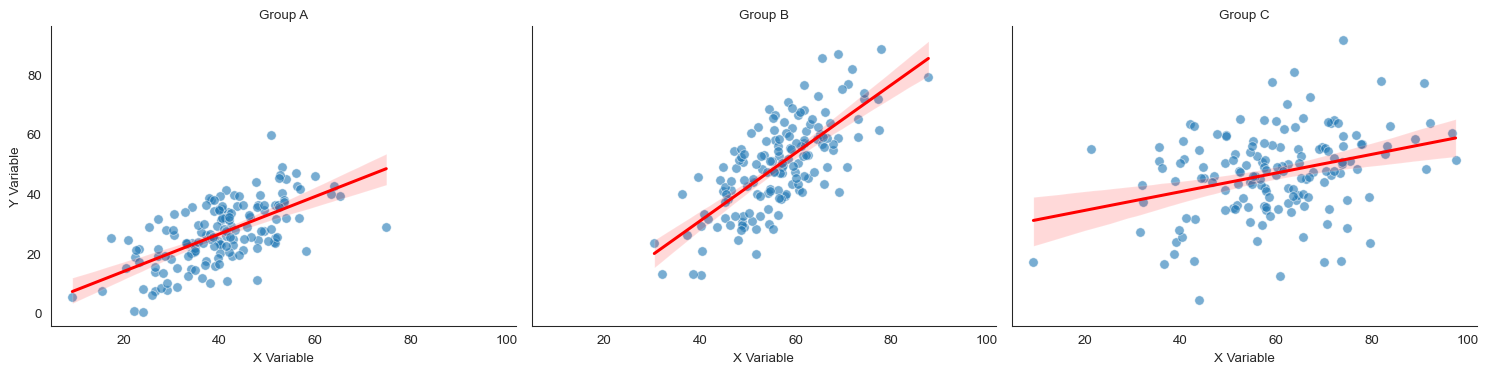

In [16]:
#| fig-cap: Small multiples showing relationship for each group separately
#| code-fold: true
g = sns.FacetGrid(df_groups, col='group', height=4, aspect=1.3)
g.map_dataframe(sns.scatterplot, x='x', y='y', alpha=0.6, s=50)
g.map_dataframe(sns.regplot, x='x', y='y', scatter=False, color='red')
g.set_axis_labels('X Variable', 'Y Variable')
g.set_titles('Group {col_name}')
sns.despine()
plt.tight_layout()

/var/folders/j7/9dgqq5g53vnbsbmvh2yqtckr0000gr/T/ipykernel_64204/3335885635.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


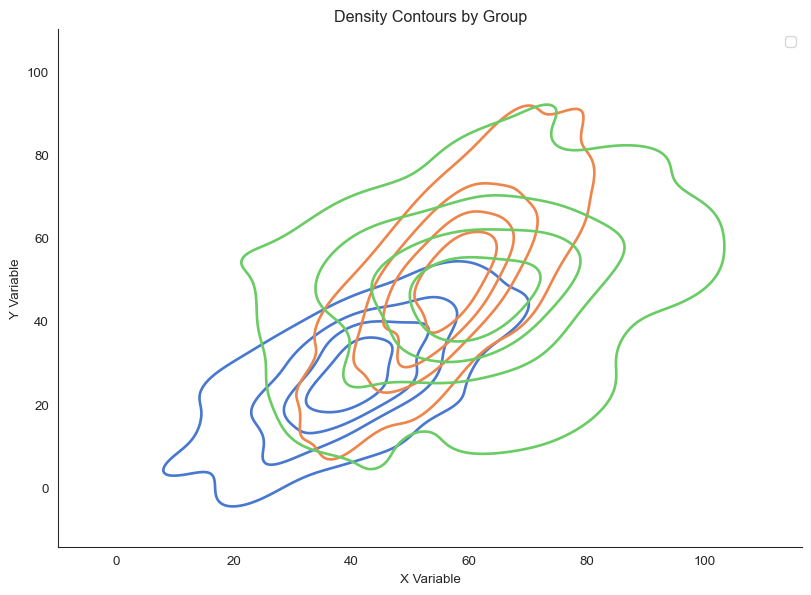

In [17]:
#| fig-cap: Overlaid density contours reveal different relationship shapes
#| code-fold: true
fig, ax = plt.subplots(figsize=(10, 7))

colors = sns.color_palette('muted', 3)
for group, color in zip(['A', 'B', 'C'], colors):
    subset = df_groups[df_groups['group'] == group]
    sns.kdeplot(x=subset['x'], y=subset['y'], levels=5,
                color=color, linewidths=2, label=f'Group {group}', ax=ax)

ax.set_xlabel('X Variable')
ax.set_ylabel('Y Variable')
ax.set_title('Density Contours by Group')
ax.legend()
sns.despine()